In [29]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# dataset = pd.read_csv('/content/drive/MyDrive/R03_25.unknown')
dataset = pd.read_csv("./R03_25")


In [3]:
dataset.drop(columns={"Unnamed: 0"}, inplace=True)

In [4]:
dataset.head()

,Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,C3..,C1..,...,Po7.,Po3.,Poz.,Po4.,Po8.,O1..,Oz..,O2..,Iz..,label
0,-57.0,-13.0,-15.0,-12.0,-13.0,-8.0,-40.0,-54.0,-12.0,-14.0,...,-38.0,-42.0,-68.0,-76.0,-103.0,-51.0,-56.0,-124.0,-28.0,0
1,-49.0,-11.0,-10.0,-12.0,-19.0,-24.0,-58.0,-51.0,-19.0,-23.0,...,-55.0,-63.0,-82.0,-87.0,-99.0,-59.0,-70.0,-149.0,-40.0,0
2,-55.0,-17.0,-16.0,-19.0,-24.0,-29.0,-66.0,-61.0,-30.0,-36.0,...,-63.0,-72.0,-91.0,-92.0,-91.0,-67.0,-77.0,-153.0,-37.0,0
3,-73.0,-42.0,-40.0,-37.0,-37.0,-40.0,-71.0,-78.0,-53.0,-53.0,...,-52.0,-66.0,-100.0,-105.0,-105.0,-67.0,-72.0,-148.0,-26.0,0
4,-87.0,-53.0,-52.0,-51.0,-45.0,-43.0,-71.0,-87.0,-65.0,-64.0,...,-82.0,-90.0,-117.0,-119.0,-118.0,-75.0,-82.0,-161.0,-35.0,0


In [24]:
from sklearn.model_selection import train_test_split
X = dataset.drop(columns={"label"})
Y = dataset['label']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)
scaler = StandardScaler()
X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_reshaped = X_train_scaled.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_reshaped = X_test_scaled.reshape(X_test.shape[0],X_test.shape[1],1)




In [58]:
train_accuracies = []

In [59]:
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128,kernel_size=3,activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))


In [60]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [61]:
epochs = 100
for epoch in range(epochs):
    history = model.fit(X_train_reshaped, Y_train, epochs=1)  
    train_accuracies.append(history.history['acc'][0])



Train on 394560 samples
394560/394560 [==============================] - 44s 113us/sample - loss: 0.9171 - acc: 0.5671
Train on 394560 samples
394560/394560 [==============================] - 43s 109us/sample - loss: 0.7651 - acc: 0.6473
Train on 394560 samples
394560/394560 [==============================] - 44s 112us/sample - loss: 0.7027 - acc: 0.6772
Train on 394560 samples
394560/394560 [==============================] - 44s 111us/sample - loss: 0.6666 - acc: 0.6939
Train on 394560 samples
394560/394560 [==============================] - 44s 111us/sample - loss: 0.6414 - acc: 0.7050
Train on 394560 samples
394560/394560 [==============================] - 44s 111us/sample - loss: 0.6238 - acc: 0.7136
Train on 394560 samples
394560/394560 [==============================] - 44s 111us/sample - loss: 0.6085 - acc: 0.7200
Train on 394560 samples
394560/394560 [==============================] - 44s 111us/sample - loss: 0.5973 - acc: 0.7252
Train on 394560 samples
394560/394560 [=========

In [62]:
test_loss, test_accuracy = model.evaluate(X_test_reshaped, Y_test, verbose=0)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Loss: 0.6475
Test Accuracy: 0.7392


In [63]:
print(train_accuracies)

[0.5671356, 0.6473109, 0.67723286, 0.69392234, 0.70496756, 0.7136126, 0.7199843, 0.72524077, 0.7293238, 0.7341266, 0.73782444, 0.7405591, 0.7439857, 0.7459119, 0.74824363, 0.7506868, 0.751911, 0.7528133, 0.75529706, 0.7566428, 0.7578036, 0.75894666, 0.7599757, 0.76110095, 0.76268756, 0.7629435, 0.76336676, 0.76493055, 0.76549065, 0.7660533, 0.7669987, 0.7679111, 0.7681189, 0.769229, 0.77004766, 0.77031887, 0.7711349, 0.7715911, 0.7722501, 0.7724959, 0.7725137, 0.77339315, 0.7731169, 0.7733146, 0.7750532, 0.7738443, 0.7748099, 0.7753371, 0.7759099, 0.7752839, 0.775882, 0.7766398, 0.77600616, 0.77649534, 0.77609235, 0.77716696, 0.77748126, 0.7776764, 0.77802616, 0.7775294, 0.77772963, 0.7786775, 0.77887774, 0.7792275, 0.7789816, 0.7794987, 0.7797268, 0.7797851, 0.779889, 0.77942014, 0.7804719, 0.78009933, 0.7806848, 0.7801627, 0.7808242, 0.7805733, 0.7809332, 0.78124744, 0.7812272, 0.7808597, 0.7813742, 0.7812373, 0.7822207, 0.78160226, 0.7812804, 0.7817569, 0.78171885, 0.78187096, 0.781

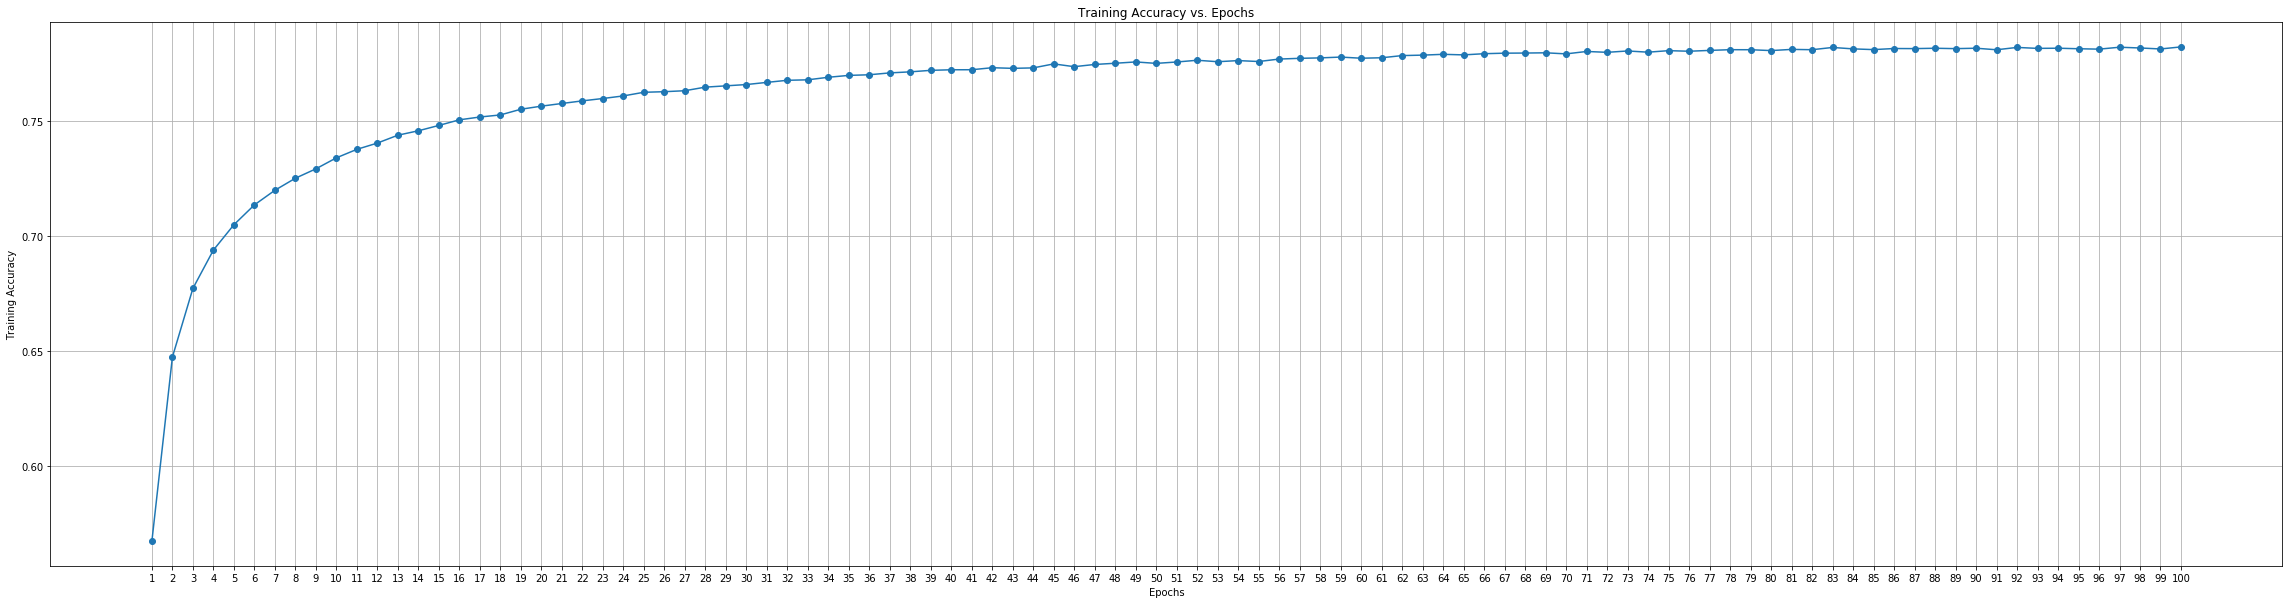

In [64]:
epochs_list = [i for i in range(1,epochs+1)]
plt.figure(figsize=(40,10))
plt.plot(epochs_list, train_accuracies, marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy vs. Epochs')
plt.grid(True)
plt.xticks(range(1, 101))

plt.show()